# 13 Grandient Boosting Machine

In [47]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, f1_score, mean_squared_error, r2_score
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from collections import Counter

In [29]:
data_url = r'https://raw.githubusercontent.com/GonieAhn/Data-Science-online-course-from-gonie/main/Data%20Store/example_data.csv'

In [30]:
data_df = pd.read_csv(data_url)
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 532 entries, 0 to 531
Data columns (total 23 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   censor   532 non-null    int64  
 1   event    532 non-null    int64  
 2   age      532 non-null    int64  
 3   wtkg     532 non-null    float64
 4   hemo     532 non-null    int64  
 5   homo     532 non-null    int64  
 6   drugs    532 non-null    int64  
 7   karnof   532 non-null    int64  
 8   oprior   532 non-null    int64  
 9   z30      532 non-null    int64  
 10  zprior   532 non-null    int64  
 11  preanti  532 non-null    int64  
 12  race     532 non-null    int64  
 13  gender   532 non-null    int64  
 14  str2     532 non-null    int64  
 15  strat    532 non-null    int64  
 16  symptom  532 non-null    int64  
 17  cd40     532 non-null    int64  
 18  cd420    532 non-null    int64  
 19  cd496    532 non-null    int64  
 20  r        532 non-null    int64  
 21  cd80     532 non

In [31]:
data_df.describe()

,censor,event,age,wtkg,hemo,homo,drugs,karnof,oprior,z30,...,gender,str2,strat,symptom,cd40,cd420,cd496,r,cd80,cd820
count,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,...,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000
mean,0.340226,801.236842,35.225564,76.061855,0.078947,0.640977,0.118421,95.432331,0.030075,0.546992,...,0.812030,0.580827,1.981203,0.167293,353.204887,336.139098,173.146617,0.603383,987.250000,928.214286
std,0.474231,326.887929,8.852094,13.224698,0.269910,0.480165,0.323410,5.981856,0.170955,0.498255,...,0.391056,0.493888,0.905946,0.373589,114.105253,130.961573,191.455406,0.489656,475.223907,438.569798
min,0.000000,33.000000,13.000000,47.401000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,103.000000,49.000000,-1.000000,0.000000,221.000000,150.000000
25%,0.000000,535.750000,29.000000,67.500000,0.000000,0.000000,0.000000,90.000000,0.000000,0.000000,...,1.000000,0.000000,1.000000,0.000000,271.000000,243.750000,-1.000000,0.000000,653.250000,626.500000
50%,0.000000,933.500000,34.000000,74.600000,0.000000,1.000000,0.000000,100.000000,0.000000,1.000000,...,1.000000,1.000000,2.000000,0.000000,346.000000,330.500000,113.000000,1.000000,881.000000,818.000000
75%,1.000000,1081.000000,40.000000,83.502000,0.000000,1.000000,0.000000,100.000000,0.000000,1.000000,...,1.000000,1.000000,3.000000,0.000000,422.000000,418.000000,324.000000,1.000000,1190.000000,1164.000000
max,1.000000,1231.000000,70.000000,149.000000,1.000000,1.000000,1.000000,100.000000,1.000000,1.000000,...,1.000000,1.000000,3.000000,1.000000,771.000000,909.000000,857.000000,1.000000,4255.000000,3130.000000


In [32]:
y = data_df['censor']
X = data_df.drop(columns=['censor'])

In [33]:
idx = list(range(X.shape[0]))
train_idx, valid_idx = train_test_split(idx, test_size=0.3, random_state=119)
print(f'train data : {len(train_idx)}')
print(f'valid data : {len(valid_idx)}')
print(f'train data y : {Counter(y.iloc[train_idx])}')
print(f'train data y : {Counter(y.iloc[valid_idx])}')

train data : 372
valid data : 160
train data y : Counter({0: 246, 1: 126})
train data y : Counter({0: 105, 1: 55})


[Gradient Boosting Machine Parameters]
  - Package : https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html
  - n_estimators : # of Tree
  - learning_rate : learning_rate과 n_estimator와 Trade-off 관계가 있음
    - Weight applied to each classifier at each boosting iteration
  - max_features : Feature 수 sampling (Overfitting 방지)
  - subsample : Data Subsample (Overfitting 방지, Bootstrap X)
  - max_depth : Tree의 최대 깊이 제한

In [34]:
estimators = [10, 20, 50]
learning = [0.05, 0.1, 0.5]
sub_sampling = [0.5, 0.75, 1]

In [35]:
save_est = []
save_lr = []
save_sub = []
f1_score_ = []

In [36]:
cnt = 0
for est in estimators:
    for lr in learning:
        for sub in sub_sampling:
            print(f'---- {cnt} ----')
            cnt += 1
            print(f'estimator : {est}, lr : {lr}, sub_sampling : {sub}')
            model = GradientBoostingClassifier(
                n_estimators=est,
                learning_rate=lr,
                subsample=sub,
                random_state=119
            )
            model.fit(X.iloc[train_idx], y.iloc[train_idx])

            # Train Acc
            y_pred_train = model.predict(X.iloc[train_idx])
            cm_train = confusion_matrix(y.iloc[train_idx], y_pred_train)
            print('train Confusion Matrix')
            print(cm_train)
            print(f'train Acc : {(cm_train[0,0], cm_train[1,1]) / cm_train.sum()}')
            print(f'train f1-score : {f1_score(y.iloc[train_idx], y_pred_train)}')

            # Test Acc
            y_pred_test = model.predict(X.iloc[valid_idx])
            cm_test = confusion_matrix(y.iloc[valid_idx], y_pred_test)
            print('test Confusion Matrix')
            print(cm_test)
            print(f'test Acc : {(cm_test[0,0], cm_test[1,1]) / cm_test.sum()}')
            print(f'test f1-score : {f1_score(y.iloc[valid_idx], y_pred_test)}')
            print('-'*20)
            save_est.append(est)
            save_lr.append(lr)
            save_sub.append(sub)
            f1_score_.append(f1_score(y.iloc[valid_idx], y_pred_test))

---- 0 ----
estimator : 10, lr : 0.05, sub_sampling : 0.5
train Confusion Matrix
[[244   2]
 [ 46  80]]
train Acc : [0.65591398 0.21505376]
train f1-score : 0.7692307692307692
test Confusion Matrix
[[100   5]
 [ 26  29]]
test Acc : [0.625   0.18125]
test f1-score : 0.6516853932584269
--------------------
---- 1 ----
estimator : 10, lr : 0.05, sub_sampling : 0.75
train Confusion Matrix
[[243   3]
 [ 40  86]]
train Acc : [0.65322581 0.2311828 ]
train f1-score : 0.8
test Confusion Matrix
[[100   5]
 [ 22  33]]
test Acc : [0.625   0.20625]
test f1-score : 0.7096774193548387
--------------------
---- 2 ----
estimator : 10, lr : 0.05, sub_sampling : 1
train Confusion Matrix
[[241   5]
 [ 36  90]]
train Acc : [0.64784946 0.24193548]
train f1-score : 0.8144796380090498
test Confusion Matrix
[[100   5]
 [ 20  35]]
test Acc : [0.625   0.21875]
test f1-score : 0.7368421052631579
--------------------
---- 3 ----
estimator : 10, lr : 0.1, sub_sampling : 0.5
train Confusion Matrix
[[238   8]
 [ 33  

In [37]:
print(f'best idx : {np.argmax(f1_score_)}, f1-score : {f1_score_[np.argmax(f1_score_)]}')
print(f'best est : {save_est[np.argmax(f1_score_)]}, lr:{save_lr[np.argmax(f1_score_)]}, sub sampling: {save_sub[np.argmax(f1_score_)]}')

best idx : 12, f1-score : 0.8468468468468467
best est : 20, lr:0.1, sub sampling: 0.5


In [38]:
best_model = GradientBoostingClassifier(
                n_estimators=70,
                learning_rate=0.05,
                subsample=0.75,
                random_state=119
            )
best_model.fit(X.iloc[train_idx], y.iloc[train_idx])
y_pred_test = best_model.predict(X.iloc[valid_idx])
cm_test = confusion_matrix(y.iloc[valid_idx], y_pred_test)
print('test Confusion Matrix')
print(cm_test)
print(f'test Acc : {(cm_test[0,0], cm_test[1,1]) / cm_test.sum()}')
print(f'test f1-score : {f1_score(y.iloc[valid_idx], y_pred_test)}')
print('-'*20)

test Confusion Matrix
[[95 10]
 [ 6 49]]
test Acc : [0.59375 0.30625]
test f1-score : 0.8596491228070176
--------------------


In [39]:
feature_map = pd.DataFrame(sorted(zip(best_model.feature_importances_, X.columns), reverse=True), columns=['Score', 'Feature'])
print(feature_map)

       Score  Feature
0   0.551746    event
1   0.101582    cd420
2   0.070442        r
3   0.049608     wtkg
4   0.047552    cd496
5   0.046233  preanti
6   0.039519     race
7   0.021911     cd80
8   0.021247    cd820
9   0.018860      age
10  0.008619      z30
11  0.007822     cd40
12  0.004964     hemo
13  0.004427   karnof
14  0.001538     homo
15  0.001486    strat
16  0.001414   oprior
17  0.000621    drugs
18  0.000407  symptom
19  0.000000   zprior
20  0.000000     str2
21  0.000000   gender


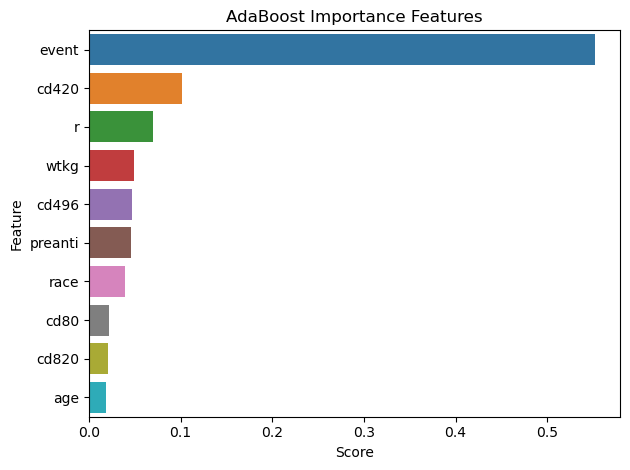

In [40]:
feature_map_20 = feature_map.iloc[:10]
sns.barplot(data=feature_map_20, x='Score', y='Feature')
plt.title('AdaBoost Importance Features')
plt.tight_layout()
plt.show()

In [41]:
# GBM Regressor
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

data_df = pd.read_csv('https://www4.stat.ncsu.edu/~boos/var.select/diabetes.tab.txt', sep='\t')
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AGE     442 non-null    int64  
 1   SEX     442 non-null    int64  
 2   BMI     442 non-null    float64
 3   BP      442 non-null    float64
 4   S1      442 non-null    int64  
 5   S2      442 non-null    float64
 6   S3      442 non-null    float64
 7   S4      442 non-null    float64
 8   S5      442 non-null    float64
 9   S6      442 non-null    int64  
 10  Y       442 non-null    int64  
dtypes: float64(6), int64(5)
memory usage: 38.1 KB


In [42]:
y = data_df['Y']
X = data_df.drop(columns=['Y'])
X = pd.get_dummies(X, columns=['SEX'])
X

,AGE,BMI,BP,S1,S2,S3,S4,S5,S6,SEX_1,SEX_2
0,59,32.1,101.00,157,93.2,38.0,4.00,4.8598,87,0,1
1,48,21.6,87.00,183,103.2,70.0,3.00,3.8918,69,1,0
2,72,30.5,93.00,156,93.6,41.0,4.00,4.6728,85,0,1
3,24,25.3,84.00,198,131.4,40.0,5.00,4.8903,89,1,0
4,50,23.0,101.00,192,125.4,52.0,4.00,4.2905,80,1,0
...,...,...,...,...,...,...,...,...,...,...,...
437,60,28.2,112.00,185,113.8,42.0,4.00,4.9836,93,0,1
438,47,24.9,75.00,225,166.0,42.0,5.00,4.4427,102,0,1
439,60,24.9,99.67,162,106.6,43.0,3.77,4.1271,95,0,1
440,36,30.0,95.00,201,125.2,42.0,4.79,5.1299,85,1,0


In [43]:
idx = list(range(X.shape[0]))
train_idx, valid_idx = train_test_split(idx, test_size=0.3, random_state=2023)
print(len(train_idx), len(valid_idx))

309 133


In [49]:
estimators = [50, 70, 90, 120]
learning = [0.05, 0.1, 0.5]
sub_sampling = [0.5, 0.75, 1]

In [50]:
save_est = []
save_lr = []
save_sub = []
r2_score_ = []

In [51]:
cnt = 0
for est in estimators:
    for lr in learning:
        for sub in sub_sampling:
            print(f'---- {cnt} ----')
            cnt += 1
            print(f'estimator : {est}, lr : {lr}, sub_sampling : {sub}')
            model = GradientBoostingRegressor(
                n_estimators=est,
                learning_rate=lr,
                subsample=sub,
                random_state=119
            )
            model.fit(X.iloc[train_idx], y.iloc[train_idx])

            # Train Acc
            y_pred_train = model.predict(X.iloc[train_idx])
            rmse_train = mean_squared_error(y.iloc[train_idx], y_pred_train, squared=False)
            print(f'train RMSE : {rmse_train}')
            print(f'train R2 : {r2_score(y.iloc[train_idx], y_pred_train)}')

            # Test Acc
            y_pred_test = model.predict(X.iloc[valid_idx])
            rmse_test = mean_squared_error(y.iloc[valid_idx], y_pred_test, squared=False)
            print(f'test RMSE : {rmse_test}')
            print(f'test R2 : {r2_score(y.iloc[valid_idx], y_pred_test)}')
            print('-'*20)
            save_est.append(est)
            save_lr.append(lr)
            save_sub.append(sub)
            r2_score_.append(r2_score(y.iloc[valid_idx], y_pred_test))

---- 0 ----
estimator : 50, lr : 0.05, sub_sampling : 0.5
train RMSE : 42.57079915195377
train R2 : 0.6767136197252009
test RMSE : 57.547389977398446
test R2 : 0.49557576372212186
--------------------
---- 1 ----
estimator : 50, lr : 0.05, sub_sampling : 0.75
train RMSE : 41.952003079594014
train R2 : 0.686043696945301
test RMSE : 58.95283076784344
test R2 : 0.4706364794924697
--------------------
---- 2 ----
estimator : 50, lr : 0.05, sub_sampling : 1
train RMSE : 42.59645822462251
train R2 : 0.6763237877832261
test RMSE : 60.02856210547344
test R2 : 0.45114128592010894
--------------------
---- 3 ----
estimator : 50, lr : 0.1, sub_sampling : 0.5
train RMSE : 35.02406840831017
train R2 : 0.7811749745491734
test RMSE : 59.0914223821234
test R2 : 0.468144603163025
--------------------
---- 4 ----
estimator : 50, lr : 0.1, sub_sampling : 0.75
train RMSE : 34.897941509579255
train R2 : 0.7827481799315098
test RMSE : 60.14518943187981
test R2 : 0.44900649856624886
--------------------
----

In [52]:
print(f'best idx : {np.argmax(r2_score_)}, r2-score : {r2_score_[np.argmax(r2_score_)]}')
print(f'best est : {save_est[np.argmax(r2_score_)]}, lr:{save_lr[np.argmax(r2_score_)]}, sub sampling: {save_sub[np.argmax(r2_score_)]}')

best idx : 18, r2-score : 0.5040693975453703
best est : 90, lr:0.05, sub sampling: 0.5
